## Scipy

Scipy offers many submodules containing various toolboxes to dedicated to common issues in scientific computing (similar to GSL and Matlab's toolboxes). It is mainly built on `numpy` and therefore often works with `numpy.array`.

From the scipy lecture notes: 

*Before implementing a routine, it is worth checking if the desired data processing is not already implemented in Scipy. As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. By contrast, Scipy’s routines are optimized and tested, and should therefore be used when possible.*

`scipy` is composed of task-specific sub-modules. As such `import scipy` is often times not advised. A collection of submodules:

| **submodule**  | **scientific task** |
| :------------- | ------------------- |
| `scipy.io`     | Data input and output |
| `scipy.linalg` | Linear algebra routines |
| `scipy.interpolate` | Interpolation |
| `scipy.optimize` | Fitting and optimization |
| `scipy.integrate` | Integration routines |
| `scipy.fftpack` | Fourier transform |
| `scipy.ndimage` | n-dimensional image package |

### `scipy.io`: importing data of different formats

In [1]:
from scipy import io

In [2]:
io.idl.readsav?

In [3]:
io.matlab.savemat?

In [4]:
io.netcdf.netcdf_file?

In [5]:
io.FortranFile?

### `scipy.linalg`: standard linear algebra operations

In [6]:
import numpy as np
from scipy import linalg

arr1 = np.array([[1, 2], 
                 [3, 4]])
print(linalg.det(arr1))

arr2 = np.array([[3, 2], 
                 [6, 4]])
print(linalg.det(arr2))

-2.0
0.0


In [7]:
iarr1 = linalg.inv(arr1)
print(iarr1)

np.dot(arr1, iarr1).round()

[[-2.   1. ]
 [ 1.5 -0.5]]


array([[1., 0.],
       [0., 1.]])

In [8]:
linalg.eigvals(arr1, np.eye(2))

array([-0.37228132+0.j,  5.37228132+0.j])

### `scipy.interpolate`: quick and simple interpolation

In [9]:
import numpy as np
from scipy import interpolate

t = np.linspace(0, 1, 6)
signal = np.sin(2 * np.pi * t)
print(signal.shape)

linear_interp = interpolate.interp1d(t, signal, kind='cubic')
linear_interp

(6,)


In [10]:
t_interp = np.linspace(0, 1, 50)
signal_interp = linear_interp(t_interp)
print(signal_interp.shape)

(50,)


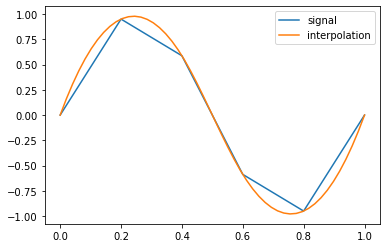

In [11]:
import matplotlib.pyplot as plt

plt.plot(t, signal, label='signal')
plt.plot(t_interp, signal_interp, label='interpolation')
plt.legend(); plt.show()

### `scipy.optimize`: Fits and optimization problems

Many tools for optimization problems, like curve-fitting (`scipy.optimize.curve_fit()`) or minimizing expressions (`scipy.optimize.minimize()`). Will be discussed later, once we are more familiar with visualization.

### `scipy.integrate`: Numerical integration

In [12]:
import numpy as np
from scipy import integrate

#integrate.quad?
res, err = integrate.quad(np.sin, 0, np.pi/2)
res, err

(0.9999999999999999, 1.1102230246251564e-14)

More integration schemes available: `scipy.integrate.quadrature()`, `scipy.integrate.romberg()`, ...

### `scipy.fftpack`: Fast and efficient Fourier transforms plus utilities

In [13]:
import numpy as np
from scipy import fftpack

t = np.linspace(0, 1, 6)  # in seconds
print(t)
signal = np.sin(2 * np.pi * t)

# compute the FFT
signal_fft = fftpack.fft(signal)

# generate sampling frequencies
freq = fftpack.fftfreq(signal.size, d=t[1])  # in Hertz
print(freq)

# compute the inverse FFT
signal_ifft = fftpack.ifft(signal_fft)
print(signal - signal_ifft)

[0.  0.2 0.4 0.6 0.8 1. ]
[ 0.          0.83333333  1.66666667 -2.5        -1.66666667 -0.83333333]
[ 3.70074342e-17+0.j  2.22044605e-16+0.j  1.11022302e-16+0.j
 -3.33066907e-16+0.j -2.22044605e-16+0.j  1.25144982e-16+0.j]


### `scipy.ndimage`: manipulation of n-dimensional arrays as images

In [14]:
from scipy import misc

face = misc.face(gray=True)

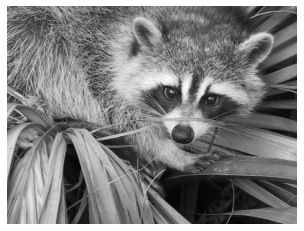

In [15]:
def show_img(img):
    import matplotlib.pyplot as plt
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')

show_img(face)

In [16]:
from scipy import ndimage

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 114 130 145 147 147]
 [  0   0   0   0   0  83 104 123 130 134]
 [  0   0   0   0   0  68  88 109 116 120]
 [  0   0   0   0   0  78  94 109 116 121]
 [  0   0   0   0   0  99 109 119 128 138]]


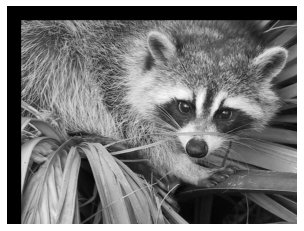

In [17]:
shifted_face = ndimage.shift(face, (50, 50))
show_img(shifted_face)
print(shifted_face[45:55, 45:55])

[[114 114 114 114 114 114 130 145 147 147]
 [114 114 114 114 114 114 130 145 147 147]
 [114 114 114 114 114 114 130 145 147 147]
 [114 114 114 114 114 114 130 145 147 147]
 [114 114 114 114 114 114 130 145 147 147]
 [114 114 114 114 114 114 130 145 147 147]
 [ 83  83  83  83  83  83 104 123 130 134]
 [ 68  68  68  68  68  68  88 109 116 120]
 [ 78  78  78  78  78  78  94 109 116 121]
 [ 99  99  99  99  99  99 109 119 128 138]]


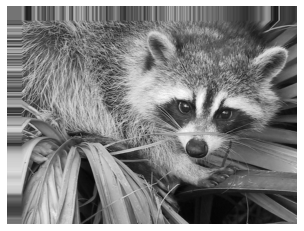

In [18]:
shifted_face = ndimage.shift(face, (50, 50), mode='nearest')
show_img(shifted_face)
print(shifted_face[45:55, 45:55])

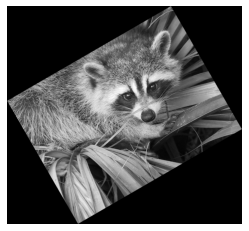

In [19]:
rotated_face = ndimage.rotate(face, 30)
show_img(rotated_face)

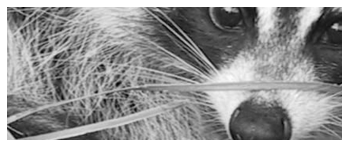

In [20]:
zoomed_face = ndimage.zoom(face, 2)
cropped_face = zoomed_face[600:-600, 600:-600]
show_img(cropped_face)

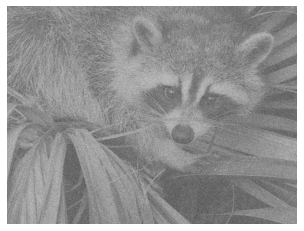

In [21]:
noisy_face = face + face.std() * 1.1 * np.random.randn(*face.shape)
show_img(noisy_face)

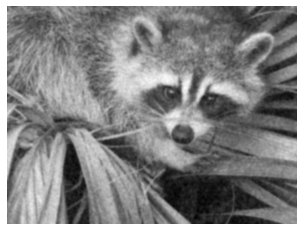

In [22]:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
show_img(blurred_face)

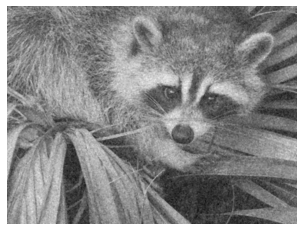

In [23]:
median_face = ndimage.median_filter(noisy_face, size=5)
show_img(median_face)